In [36]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chisqprob
from scipy.stats import chisquare
%matplotlib inline
from os import listdir
from os.path import isfile, join

In [37]:
# Set the font path properly here if not using Windows. Otherwise just comment this out
plt.style.use('ggplot')
font_path = 'C:\Windows\Fonts\Arial.ttf'
font_prop = font_manager.FontProperties(size=16)
title_font = {'fontname':'Arial', 'size':'17', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20','weight':'bold'}

xtickFont = 17
ytickFont = 17
arrayOfPredictedValues = []
arrayOfLabels = []
numberOfModels = 0
arrayOfColor = ['#B21212','#0971B2','#FFFC19','#12B286','#9C00B2',
                '#8AFF19','#071A66','#FF2CC1','#38CACC','#FF8F0A']

In [38]:
def GoodnessOfFitPoisson(observedValues, blockageType):
    xSum = np.sum(observedValues)
    muHat = xSum / len(observedValues)
    # Since the expected value of Poisson is equal to its mean
    # we will use mean to perform chisquare test of goodness-of-fit
    expectedValues = np.ones(shape=(1, len(X))).fill(muHat)
    goodnessOfFit = chisquare(observedValues, expectedValues)
    print('{0}\tChisquare-Value: {1}\tp-Value: {2}'.format(blockageType,goodnessOfFit.statistic,
                                                           goodnessOfFit.pvalue))

In [39]:
def GeneralizedLinearRegression(blockageData,dependentVariable,independentVariable, distributionFamily,
                                familyName, blockageName, graphFileName, gridId):
    print('GENERALIZED LINEAR REGRESSION - {0} Family, for {1}'.format(familyName,blockageName))
    formula = '{0}~{1}'.format(dependentVariable,independentVariable)
    model = smf.glm(formula=formula, data=blockageData, family=distributionFamily)
    fittedModel = model.fit()
    print('Deviance Residual', fittedModel.deviance)
    pearsonResiduals = fittedModel.resid_pearson
    devianceResiduals = fittedModel.resid_deviance
    pValue = chisqprob(fittedModel.deviance, fittedModel.df_resid)
    # H0 (null hypothesis) : Model correctly follows given distribution
    # H1 (alternative hypothesis): Model does not follow given distribution
    print('Chisquare value', pValue)
    #if pValue > 0.05:
    #    print('Can NOT reject the null hypothesis. Model correctly follows {0} distribution.'.format(familyName))
    #else:
        #print('Reject the null hypothesis. Model does not follow {0} distribution'.format(familyName))
    #print(fittedModel.summary())
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
         31, 32, 33, 34, 35]
    newValues = pd.DataFrame(x)
    newValues.columns = ['Index']
    predictedY = fittedModel.predict(newValues)
    arrayOfPredictedValues.append(predictedY)
    arrayOfLabels.append('Grid {0}'.format(gridId))
    print('=========================================================================================================')
    print('=========================================================================================================')

In [40]:
def ShowGraph(trends,labels,numberOfPlot):
    graphFileName = '{0}\\{1}_{2}_fitted.png'.format(folderLocationImages20,
                                                  blockageType,numberOfPlot)
    fig = plt.figure(figsize=(12, 8), dpi=400)
    ax = plt.subplot(111)
    i=0
    if numberOfPlot == 1:
        for trend in trends:
            ax.plot(trend, marker='o', label=labels[i],color=arrayOfColor[i])
            i += 1
    else:
        for trend in trends:
            ax.plot(trend, marker='o', label=labels[i],color=arrayOfColor[5+i])
            i += 1

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13),
              fancybox=True, shadow=True, ncol=5)
    plt.xticks(fontsize = xtickFont)
    plt.yticks(fontsize = ytickFont)
    plt.xlabel('Month/Year', **axis_font)
    plt.ylabel('Blockage Count', **axis_font)
    plt.savefig(graphFileName, dpi=400)
    #plt.show()

In [41]:
# blockageTypes = ['TotalCount','SanitaryProductsCount','UnknownCount']
# blockageTypeNames = ['Total Blockages','Sanitary Products','Missing\\Unknown']
blockageTypes = ['TotalCount']
blockageTypeNames = ['Total Blockages']

folderLocationData20 = "C:\\Users\\lenovo\\Documents\\Dissertation\\Report\\" \
                       "DataFiles\\" \
                       "GridFiles_Reduced_5km"
folderLocationImages20 = "C:\\Users\\lenovo\\Documents\\Dissertation\\Report\\" \
                         "Images\\" \
                         "GLM_5km"
onlyfiles = [f for f in listdir(folderLocationData20) if isfile(join(folderLocationData20, f))]
i = 0

GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Total Blockages
Deviance Residual 0.858876827383
Chisquare value 1.0
GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Total Blockages
Deviance Residual 0.788867589752
Chisquare value 1.0
GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Total Blockages
Deviance Residual 0.730491365577
Chisquare value 1.0
GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Total Blockages
Deviance Residual 0.818228027646
Chisquare value 1.0
GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Total Blockages
Deviance Residual 0.82573669889
Chisquare value 1.0
GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Total Blockages
Deviance Residual 0.689174877932
Chisquare value 1.0
GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Total Blockages
Deviance Residual 0.370672842789
Chisquare value 1.0
GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Total Blockages
Devian

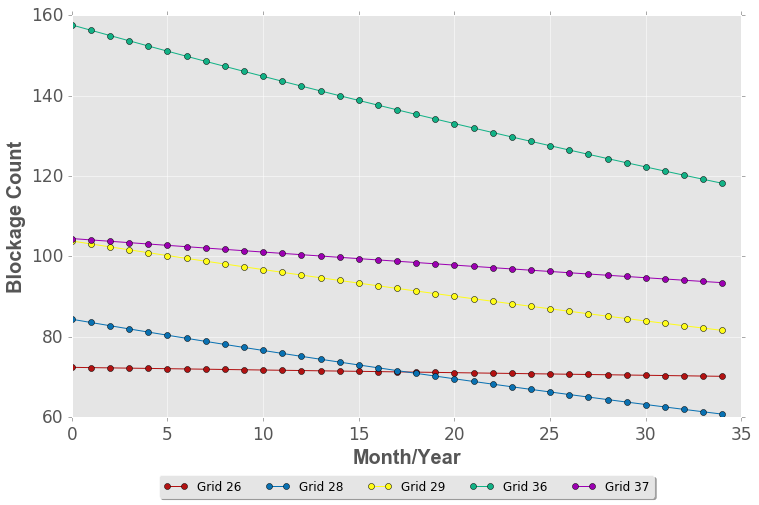

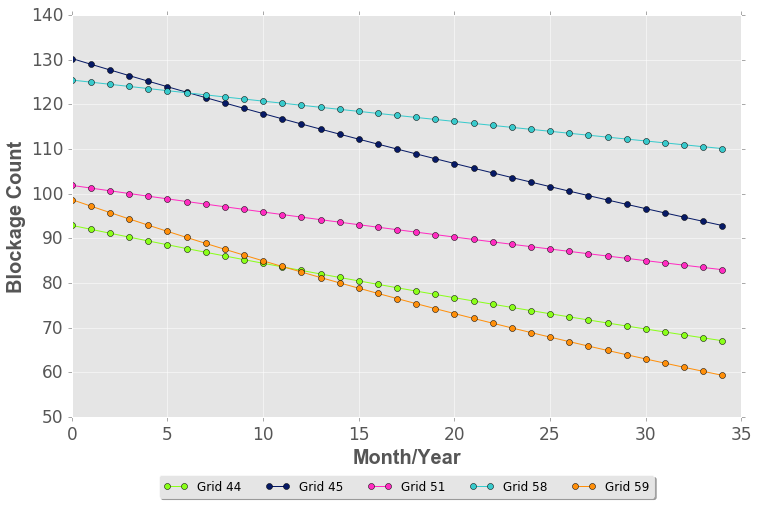

In [42]:
for file in onlyfiles:
    completeFileGridAnalysis = '{0}\\{1}'.format(folderLocationData20, file)
    data = pd.DataFrame(pd.read_csv(completeFileGridAnalysis))
    fileComponents = file.split('_')
    gridId = fileComponents[0][4:]
    i=0
    for blockageType in blockageTypes:        
        negativeBin = sm.families.NegativeBinomial()
        familyName = 'Negative Binomial'
        GeneralizedLinearRegression(
            blockageData=data,
            dependentVariable=blockageType,
            independentVariable='Index',
            distributionFamily=negativeBin,
            familyName=familyName,
            blockageName=blockageTypeNames[i],
            graphFileName='{0}\\{1}_{2}_{3}.png'.format(folderLocationImages20, file,
                                                      blockageType, familyName),
            gridId=gridId)
        i += 1

trends = []
labels = []
numberOfPlot = 1
current = 0
for count in range(0,len(arrayOfPredictedValues)):    
    if current == 5:
        ShowGraph(trends=trends,labels=labels, numberOfPlot=numberOfPlot)
        print('printed')
        trends = []
        labels = []
        print(numberOfPlot)
        numberOfPlot += 1        
        current = 0
    current +=1
    trends.append(arrayOfPredictedValues[count])
    labels.append(arrayOfLabels[count])
   
if current >0: 
    ShowGraph(trends,labels,numberOfPlot)